## Personal Loan Campaign

Description

Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

Objective

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.
Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

## Import Libraries

In [332]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
pd.set_option('mode.chained_assignment', None)

## Load and review data

In [333]:
pdata = pd.read_csv("Loan_Modelling.csv")

In [334]:
pdata.shape # Check number of columns and rows in data frame

(5000, 14)

In [335]:
pdata.head() # To check first 5 rows of data set

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [336]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [337]:
pdata.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [338]:
pdata.isnull().values.any() # If there are any null values in data set

False

### Dropping negative experience data

In [339]:
pdata.drop(pdata[pdata['Experience'] < 0].index, inplace = True)

In [340]:
pdata.reset_index(drop=True,inplace=True)

### Log transformation on Income & CCAvg data

In [341]:
for column in ['Income']:
    try:
        pdata[column] = np.log10(pdata[column])
    except (ValueError, AttributeError):
        pass

In [342]:
pdata['CCAvg'].loc[(pdata['CCAvg'] <= 0)] = 1e-1
for column in ['CCAvg']:
    try:
        pdata[column] = np.log10(pdata[column])
    except (ValueError, AttributeError):
        pass

### Converting US Zipcode to Major City categorical variable

In [343]:
#!pip install uszipcode
from uszipcode import SearchEngine
engine = SearchEngine()
#zipcode = engine.by_zipcode(60007)
#print(zipcode.zipcode, zipcode.major_city, zipcode.population)
pdata['Major_City'] = "None"
for index,x in pdata['ZIPCode'].iteritems():
    try:
        zipcode = engine.by_zipcode(x)
        pdata['Major_City'].iat[index] = zipcode.major_city
    except:
        pass
pdata.drop(['ZIPCode'],axis=1,inplace=True)
pdata['Major_City'].value_counts()

Los Angeles      372
San Diego        267
San Francisco    255
Berkeley         236
Sacramento       146
                ... 
Sierra Madre       1
Sausalito          1
Tahoe City         1
Ladera Ranch       1
Stinson Beach      1
Name: Major_City, Length: 245, dtype: int64

In [344]:
pdata.describe()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,2501.268795,45.557195,20.331043,1.774349,2.391471,0.088376,1.878941,56.634398,0.097009,0.104285,0.061035,0.597009,0.294058
std,1443.277676,11.320735,11.311973,0.302698,1.148444,0.467700,0.839745,101.828885,0.296000,0.305660,0.239418,0.490549,0.455664
min,1.000000,24.000000,0.000000,0.903090,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1254.750000,36.000000,10.750000,1.591065,1.000000,-0.154902,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2497.500000,46.000000,20.000000,1.806180,2.000000,0.176091,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,1.991226,3.000000,0.414973,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,2.350248,4.000000,1.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


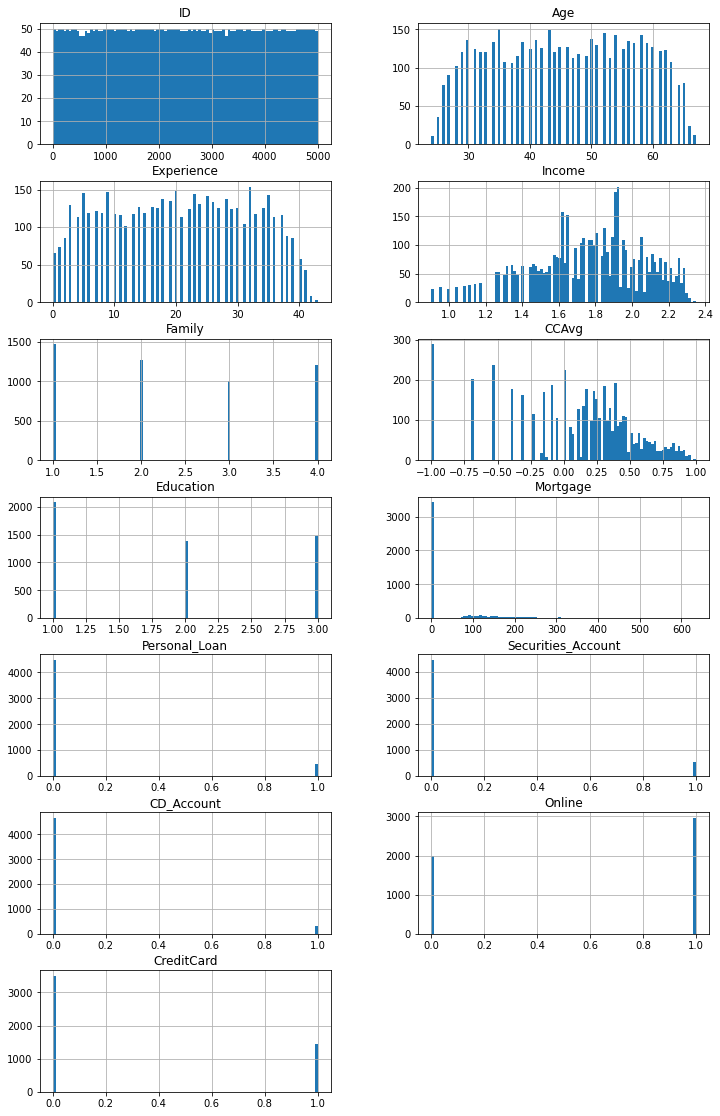

In [345]:
columns = list(pdata)[0:-1] # Excluding Outcome column which has only 
pdata[columns].hist(stacked=False, bins=100, figsize=(12,40), layout=(14,2)); 
# Histogram of first 8 columns

## Identify Correlation in data 

In [346]:
pdata.corr() # It will show correlation matrix 

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,1.000000,-0.009794,-0.009406,-0.014158,-0.016382,-0.014932,0.021902,-0.011172,-0.025124,-0.018961,-0.007085,-0.001508,0.017294
Age,-0.009794,1.000000,0.994101,-0.059096,-0.039279,-0.041489,0.046222,-0.015184,-0.014204,0.000496,0.003261,0.013542,0.007496
Experience,-0.009406,0.994101,1.000000,-0.052617,-0.045610,-0.045089,0.018243,-0.013459,-0.014121,-0.000457,0.005450,0.013518,0.008876
Income,-0.014158,-0.059096,-0.052617,1.000000,-0.120491,0.533583,-0.163965,0.184276,0.405971,0.001394,0.133428,0.015393,-0.007165
Family,-0.016382,-0.039279,-0.045610,-0.120491,1.000000,-0.053051,0.064032,-0.020419,0.063088,0.020155,0.015274,0.008466,0.012905
CCAvg,-0.014932,-0.041489,-0.045089,0.533583,-0.053051,1.000000,-0.069895,0.089296,0.281172,0.012893,0.095071,-0.005937,-0.003585
Education,0.021902,0.046222,0.018243,-0.163965,0.064032,-0.069895,1.000000,-0.032559,0.138339,-0.007508,0.014639,-0.013932,-0.012604
Mortgage,-0.011172,-0.015184,-0.013459,0.184276,-0.020419,0.089296,-0.032559,1.000000,0.142322,-0.003717,0.089369,-0.006754,-0.006910
Personal_Loan,-0.025124,-0.014204,-0.014121,0.405971,0.063088,0.281172,0.138339,0.142322,1.000000,0.022216,0.315769,0.006175,0.002776
Securities_Account,-0.018961,0.000496,-0.000457,0.001394,0.020155,0.012893,-0.007508,-0.003717,0.022216,1.000000,0.319056,0.016101,-0.017030


In [347]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

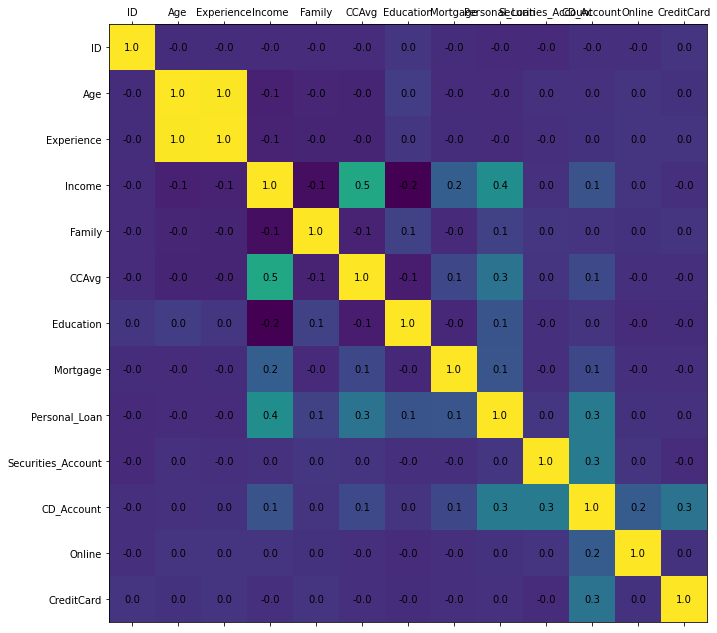

In [303]:
plot_corr(pdata)

In above plot yellow colour represents maximum correlation and blue colour represents minimum correlation.
We can see none of variable have correlation with any other variables.

Age & Experience is directly and one of them can be removed.
Personal Loan has somewhat positive correlation with income, CCAvg & Securities Account.

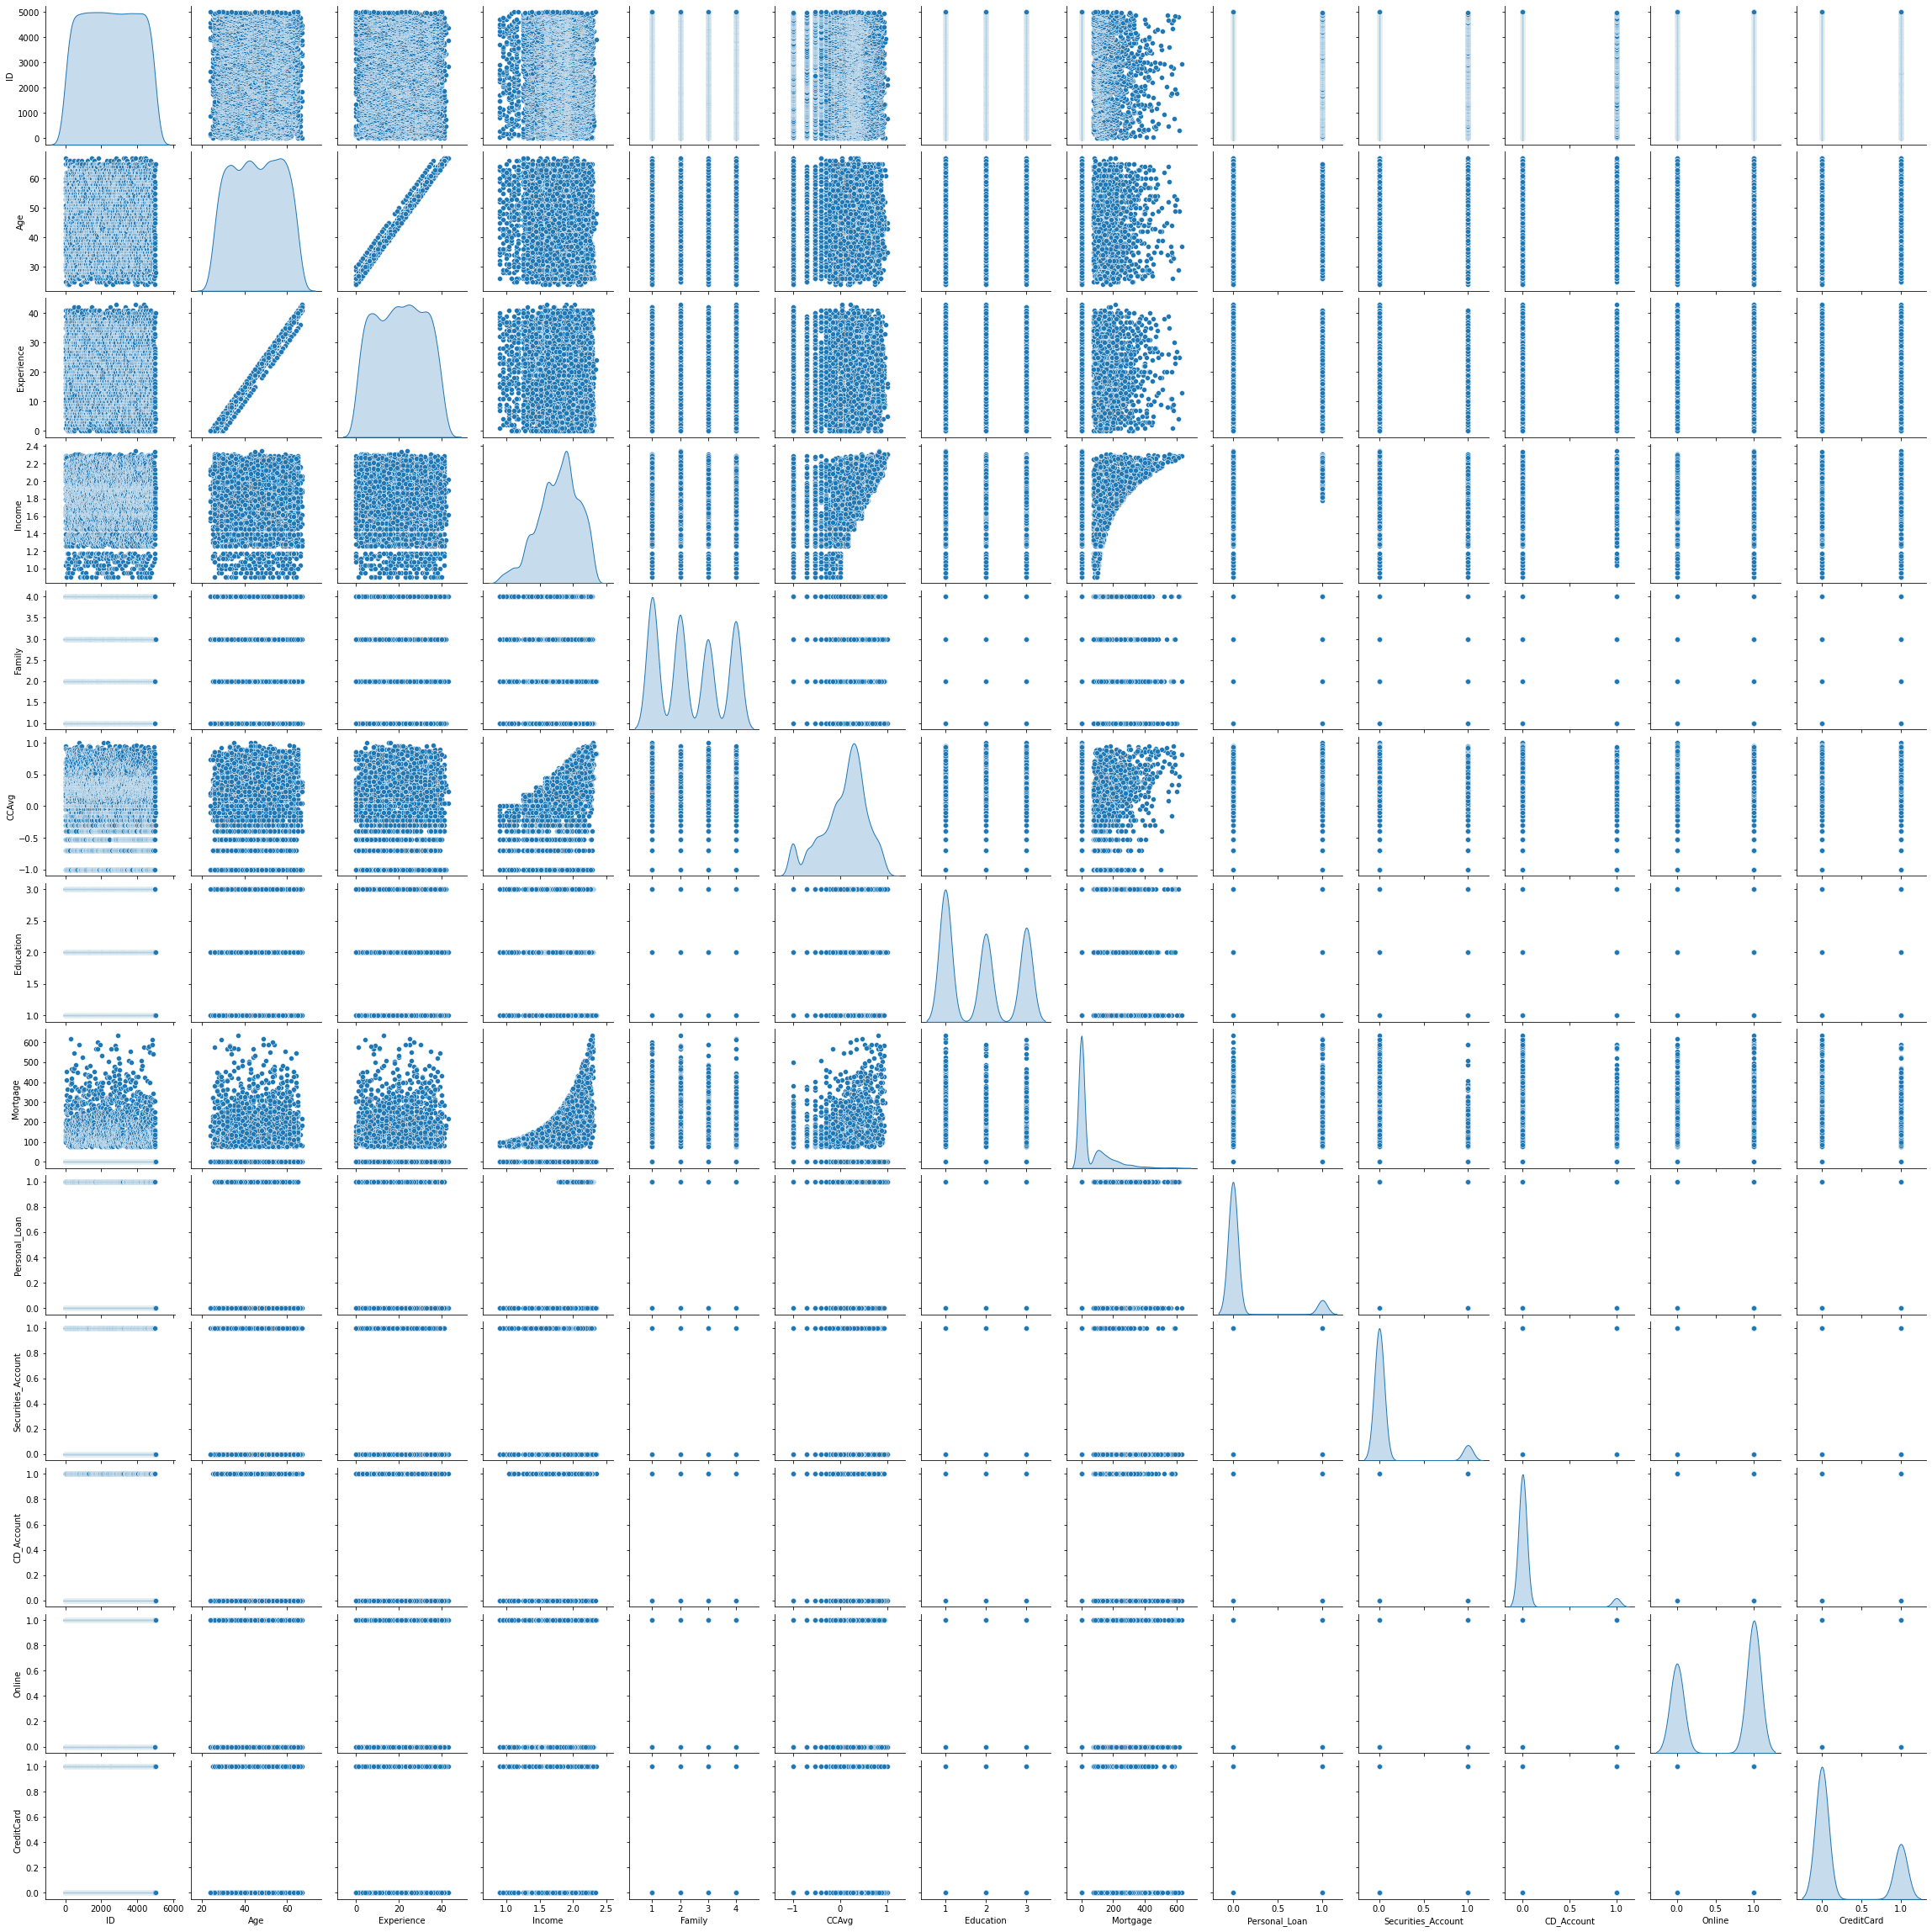

In [304]:
sns.pairplot(pdata,diag_kind='kde')

### Convert Major City column categorical variable to mutiple columns

In [348]:
pdata = pd.get_dummies(pdata, columns=['Major_City'],drop_first=True)

In [349]:
pdata.describe()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,...,Major_City_Vista,Major_City_Walnut Creek,Major_City_Weed,Major_City_West Covina,Major_City_West Sacramento,Major_City_Westlake Village,Major_City_Whittier,Major_City_Woodland Hills,Major_City_Yorba Linda,Major_City_Yucaipa
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,...,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,2501.268795,45.557195,20.331043,1.774349,2.391471,0.088376,1.878941,56.634398,0.097009,0.104285,...,0.000808,0.005053,0.000404,0.000808,0.001819,0.000808,0.000808,0.002425,0.000808,0.000606
std,1443.277676,11.320735,11.311973,0.302698,1.148444,0.467700,0.839745,101.828885,0.296000,0.305660,...,0.028424,0.070909,0.020103,0.028424,0.042614,0.028424,0.028424,0.049192,0.028424,0.024618
min,1.000000,24.000000,0.000000,0.903090,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1254.750000,36.000000,10.750000,1.591065,1.000000,-0.154902,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2497.500000,46.000000,20.000000,1.806180,2.000000,0.176091,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,1.991226,3.000000,0.414973,3.000000,101.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5000.000000,67.000000,43.000000,2.350248,4.000000,1.000000,3.000000,635.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Calculate accepted PL ratio of True/False from outcome variable 

In [350]:
n_true = len(pdata.loc[pdata['Personal_Loan'] == True])
n_false = len(pdata.loc[pdata['Personal_Loan'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 480 (9.70%)
Number of false cases: 4468 (90.30%)


So we have 90.4% people in current data set who didn't accept personal loan and only 9.6% accepted personal loan. 

Data seems to be skewed!

## Spliting the data 
We will use 70% of data for training and 30% for testing.

In [351]:
from sklearn.model_selection import train_test_split

X = pdata.drop('Personal_Loan',axis=1)     # Predictor feature columns (8 X m)
Y = pdata['Personal_Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,...,Major_City_Vista,Major_City_Walnut Creek,Major_City_Weed,Major_City_West Covina,Major_City_West Sacramento,Major_City_Westlake Village,Major_City_Whittier,Major_City_Woodland Hills,Major_City_Yorba Linda,Major_City_Yucaipa
3358,3396,41,16,1.544068,2,0.146128,2,135,0,0,...,0,0,0,0,0,0,0,0,0,0
367,371,36,12,1.397940,4,0.000000,1,147,0,0,...,0,0,0,0,0,0,0,0,0,0
2316,2338,43,16,2.303196,1,1.000000,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3305,3342,35,9,1.518514,2,-0.522879,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3564,3603,47,21,1.623249,4,-1.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Lets check split of data

In [352]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata.index)) * 100))

69.99% data is in training set
30.01% data is in test set


Now lets check True/False ratio in split data 

In [353]:
print("Original True Values    : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['Personal_Loan'] == 1]), (len(pdata.loc[pdata['Personal_Loan'] == 1])/len(pdata.index)) * 100))
print("Original False Values   : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['Personal_Loan'] == 0]), (len(pdata.loc[pdata['Personal_Loan'] == 0])/len(pdata.index)) * 100))
print("")
print("Training True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original True Values    : 480 (9.70%)
Original False Values   : 4468 (90.30%)

Training True Values    : 335 (9.67%)
Training False Values   : 3128 (90.33%)

Test True Values        : 145 (9.76%)
Test False Values       : 1340 (90.24%)



In [354]:
x_train.head(10)

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,...,Major_City_Vista,Major_City_Walnut Creek,Major_City_Weed,Major_City_West Covina,Major_City_West Sacramento,Major_City_Westlake Village,Major_City_Whittier,Major_City_Woodland Hills,Major_City_Yorba Linda,Major_City_Yucaipa
3358,3396,41,16,1.544068,2,0.146128,2,135,0,0,...,0,0,0,0,0,0,0,0,0,0
367,371,36,12,1.397940,4,0.000000,1,147,0,0,...,0,0,0,0,0,0,0,0,0,0
2316,2338,43,16,2.303196,1,1.000000,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3305,3342,35,9,1.518514,2,-0.522879,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3564,3603,47,21,1.623249,4,-1.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4652,4704,57,27,1.792392,3,0.301030,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4685,4737,51,25,1.812913,3,-0.154902,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4404,4453,59,35,1.724276,4,0.361728,3,174,0,0,...,0,0,0,0,0,0,0,0,0,0
4885,4937,45,20,1.973128,3,-0.301030,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,3027,44,20,1.908485,4,-0.096910,1,228,0,0,...,0,0,0,0,0,0,0,0,0,0


# Logistic Regression

In [355]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear", random_state=1)
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.000079 -0.702875  0.695447  7.473815  0.450991  1.712575  1.323139   

          7         8         9  ...       247       248       249       250  \
0  0.001757 -0.820036  2.990403  ...  0.043605 -0.011633 -0.001666  0.253032   

        251       252       253      254       255  intercept  
0 -0.021843 -0.006148  0.205099 -0.00856 -0.035279  -3.004487  

[1 rows x 257 columns]


In [356]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9414141414141414


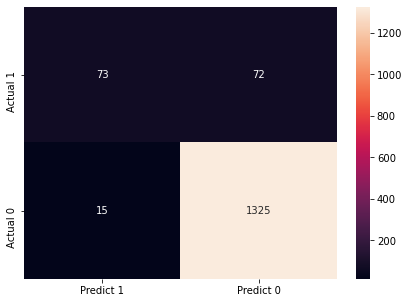

Recall on training set :  0.5671641791044776
Recall on test set :  0.503448275862069


In [357]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1"," Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.show()

pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

The confusion matrix

True Positives (TP): 73

True Negatives (TN): 1325

False Positives (FP): 15

False Negatives (FN): 72

Recall is low though accuracy is good!

## Hyperparameter (Grid Search) tuning for potential improvement of Logistics Regression result

In [379]:
from sklearn.model_selection import GridSearchCV
# Choose the type of classifier. 
estimator = LogisticRegression(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'penalty': ['elasticnet'], 
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(x_train, y_train)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.


# Decision tree CART

Accuracy on training set :  1.0
Accuracy on test set :  0.9784511784511785


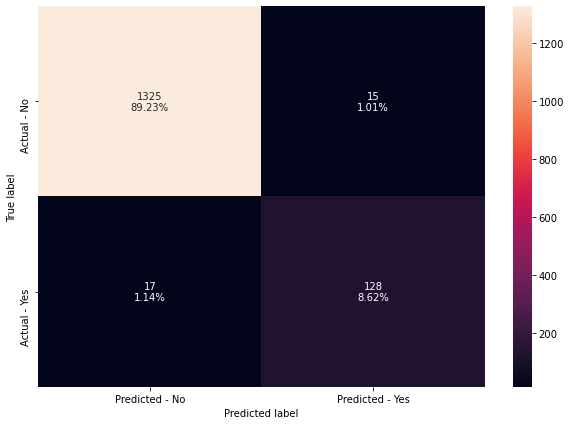

In [359]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)
print("Accuracy on training set : ",dTree.score(x_train, y_train))
print("Accuracy on test set : ",dTree.score(x_test, y_test))

#Checking number of positives
Y.sum(axis = 0)

## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(x_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
make_confusion_matrix(dTree,y_test)

In [360]:
# Recall on train and test
get_recall_score(dTree)

Recall on training set :  1.0
Recall on test set :  0.8827586206896552


Recall is quite good compared to logistics regression!

In [361]:
feature_names = list(X.columns)
print(feature_names)

['ID', 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Major_City_Alameda', 'Major_City_Alamo', 'Major_City_Albany', 'Major_City_Alhambra', 'Major_City_Anaheim', 'Major_City_Antioch', 'Major_City_Aptos', 'Major_City_Arcadia', 'Major_City_Arcata', 'Major_City_Bakersfield', 'Major_City_Baldwin Park', 'Major_City_Banning', 'Major_City_Bella Vista', 'Major_City_Belmont', 'Major_City_Belvedere Tiburon', 'Major_City_Ben Lomond', 'Major_City_Berkeley', 'Major_City_Beverly Hills', 'Major_City_Bodega Bay', 'Major_City_Bonita', 'Major_City_Boulder Creek', 'Major_City_Brea', 'Major_City_Brisbane', 'Major_City_Burlingame', 'Major_City_Calabasas', 'Major_City_Camarillo', 'Major_City_Campbell', 'Major_City_Canoga Park', 'Major_City_Capistrano Beach', 'Major_City_Capitola', 'Major_City_Cardiff By The Sea', 'Major_City_Carlsbad', 'Major_City_Carpinteria', 'Major_City_Carson', 'Major_City_Castro Valley', 'Major_City

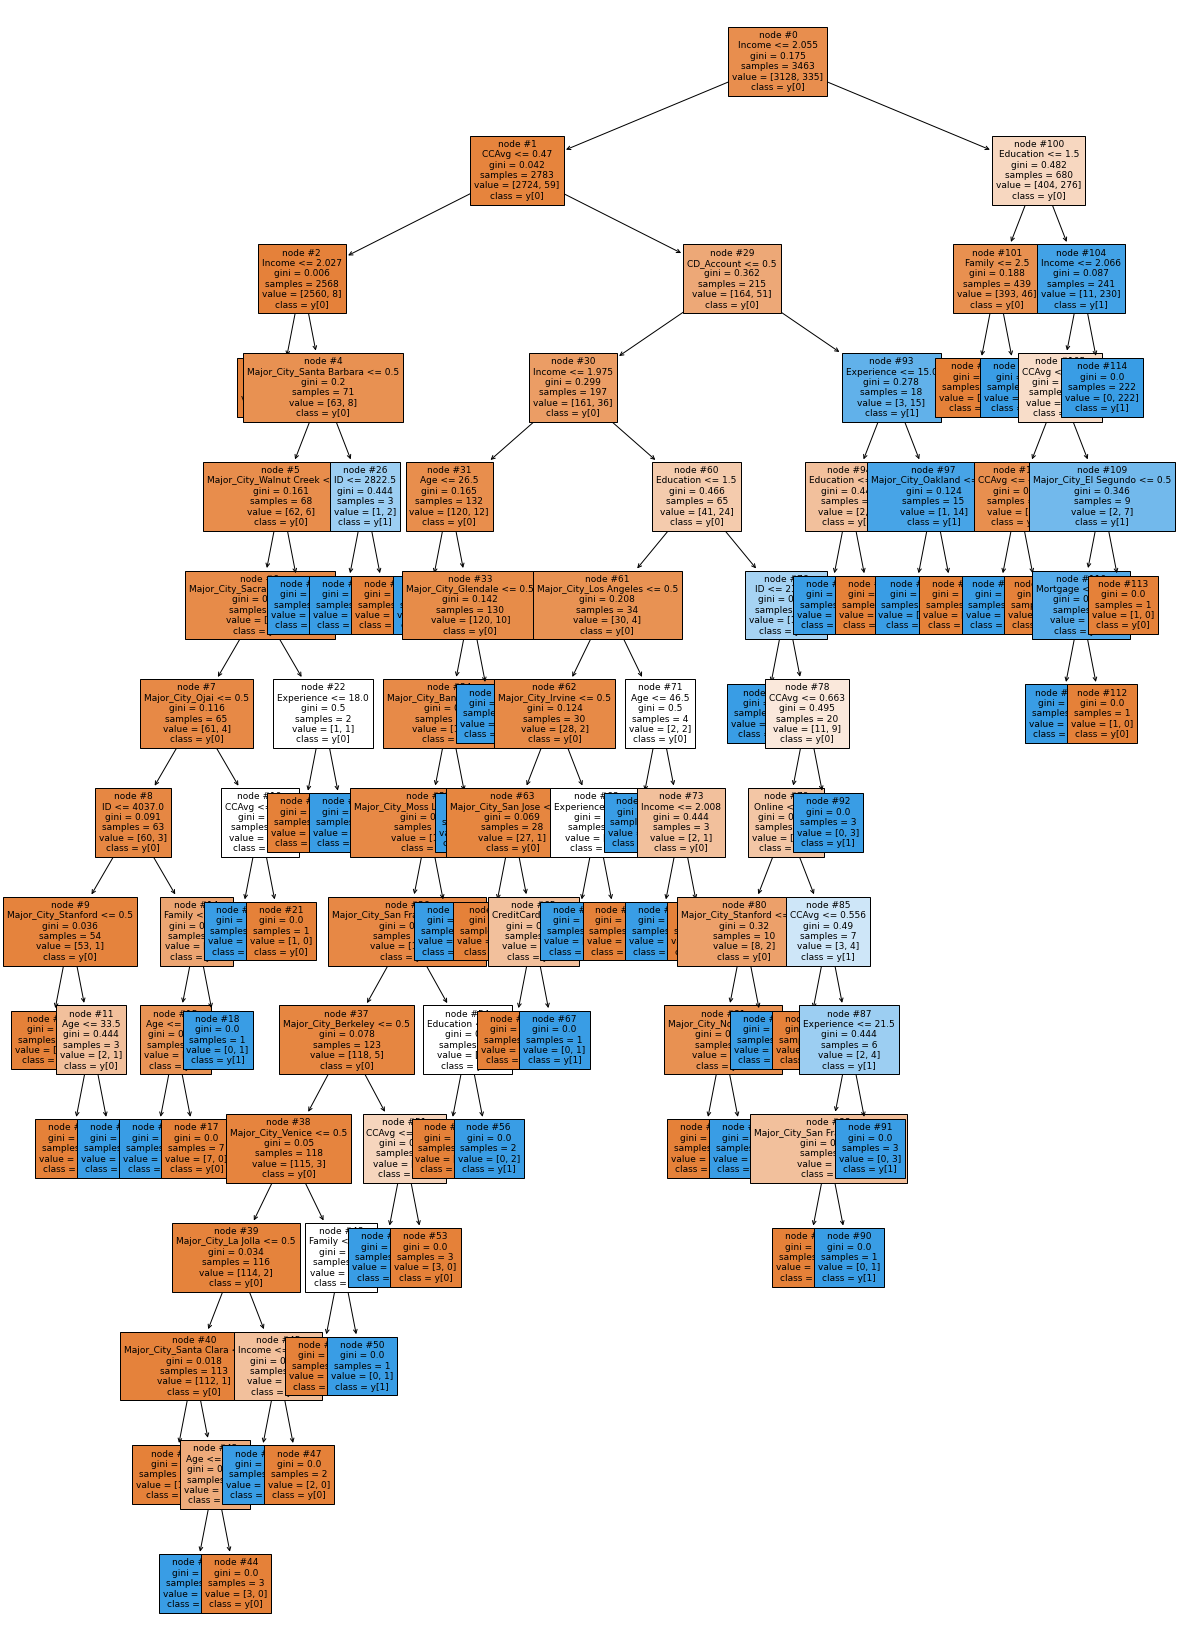

In [363]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

### Income, CCAvg & Education are important features in deciding the outcome. 

# Pre-pruning method - CART

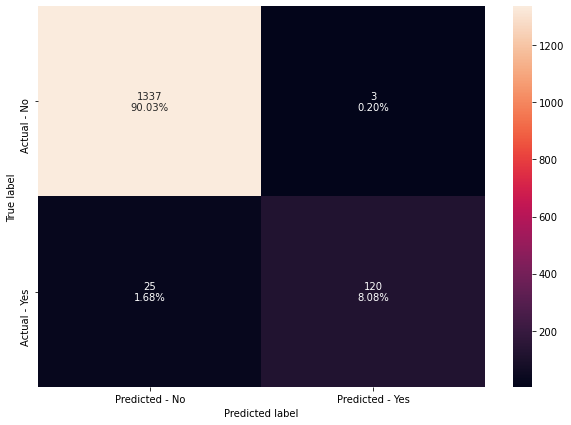

In [365]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(x_train, y_train)

make_confusion_matrix(dTree1, y_test)

In [366]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(x_train, y_train))
print("Accuracy on test set : ",dTree1.score(x_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.9841178169217442
Accuracy on test set :  0.9811447811447811
Recall on training set :  0.844776119402985
Recall on test set :  0.8275862068965517


As expected, recall drops for a pruned tree compared to a full tree!

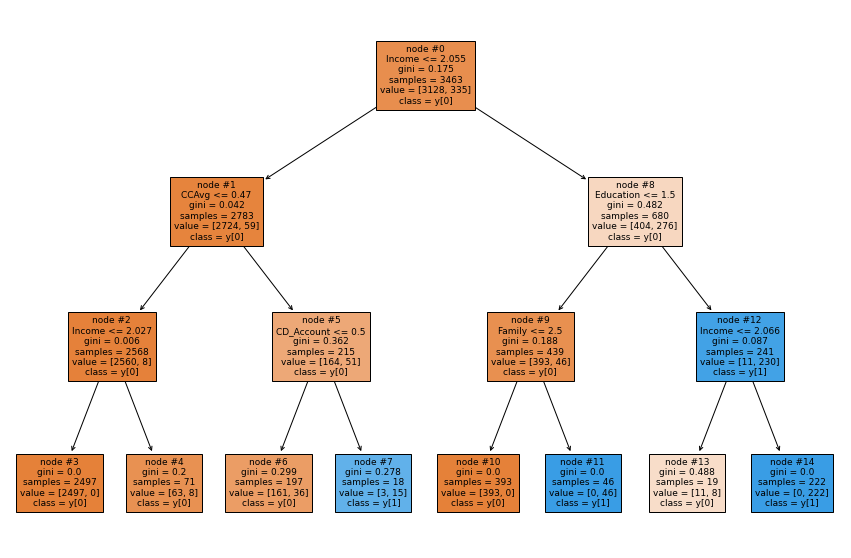

In [369]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [368]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree1,feature_names=feature_names,show_weights=True))

# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

importances = dTree1.feature_importances_
indices = np.argsort(importances)

|--- Income <= 2.05
|   |--- CCAvg <= 0.47
|   |   |--- Income <= 2.03
|   |   |   |--- weights: [2497.00, 0.00] class: 0
|   |   |--- Income >  2.03
|   |   |   |--- weights: [63.00, 8.00] class: 0
|   |--- CCAvg >  0.47
|   |   |--- CD_Account <= 0.50
|   |   |   |--- weights: [161.00, 36.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 15.00] class: 1
|--- Income >  2.05
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [393.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 46.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 2.07
|   |   |   |--- weights: [11.00, 8.00] class: 0
|   |   |--- Income >  2.07
|   |   |   |--- weights: [0.00, 222.00] class: 1

                               Imp
Education                 0.433683
Income                    0.338340
Family                    0.159032
CCAvg                     0.041985
CD_Account                0.026960
...                

This also shows the important features are Education, Income, Family & CCAvg in deciding the final outcome where personal loan will be taken!

#### Key takeaways/ Actionable insights

1. Decision tree provides much better fit compared to logistics regression. Recall score is much higher for decision tree!
2. Marketing should target people with better education , income , family & CCavg expenses . They have more probability for converting for loan outcome. 
3. Some major city for focus should be Santa Barbara, Los Angeles, Oakland, Walnut Creek which can likely bring most customers for the bank.